# Database Application
---
**Author:** Jacob Redmon, Christina Porter 
**Version:** 1.5  
**Semester:** Spring 2021  
**Summary:**  

This project has two goals: 1) is for you to apply the exploratory analysis techniques you have learned this semester to prepare a dataset and 2) implement a machine learning (ML) model.

## I. Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## II. Data Set Description

In [2]:
df = pd.read_csv('hotel_bookings.csv')

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

The columns are in a sensible order, so no need to rearrange them.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

The column `company` is mainly empty, so we will drop it entirely. To clean the rest of the data, we will drop any rows that have any empty data using the `dropna()` function. Next, we need to reset the index to compensate for the dropped rows. We now have `102894` rows, dropped from `119390`.

In [6]:
dfa = df.drop(columns='company')
dfa = dfa.dropna()
dfa = dfa.reset_index(drop=True)
len(dfa.index)

102894

In [7]:
dfa.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

## III. Data Set Summary Statistics

In [8]:
dfb = dfa.describe().T
dfb

,count,mean,std,min,25%,50%,75%,max
is_canceled,102894.0,0.390314,0.487823,0.00,0.0,0.0,1.0,1.0
lead_time,102894.0,111.740092,107.681013,0.00,26.0,79.0,169.0,629.0
arrival_date_year,102894.0,2016.156977,0.706117,2015.00,2016.0,2016.0,2017.0,2017.0
arrival_date_week_number,102894.0,27.339155,13.279990,1.00,17.0,28.0,38.0,53.0
arrival_date_day_of_month,102894.0,15.786771,8.794042,1.00,8.0,16.0,24.0,31.0
stays_in_weekend_nights,102894.0,0.978181,1.003991,0.00,0.0,1.0,2.0,16.0
stays_in_week_nights,102894.0,2.589655,1.905941,0.00,1.0,2.0,3.0,41.0
adults,102894.0,1.899926,0.490891,0.00,2.0,2.0,2.0,26.0
children,102894.0,0.111231,0.411982,0.00,0.0,0.0,0.0,10.0
babies,102894.0,0.007697,0.097089,0.00,0.0,0.0,0.0,10.0


Function to calculate the proportion for categorical variables.

In [9]:
def proportion(x):
    x = x / 102894 * 100
    return x

Function to generate CSV files for proportion tables for categorical variables.

In [10]:
def prop_table(x):
    dfc = dfa[x].groupby(dfa[x]).count().to_frame()
    dfc.insert(1, 'proportion', dfc[x].apply(proportion))
    dfc.to_csv('proportion_tables/'+ x + '_proportion.csv')
    return dfc

In [11]:
categorical = ['hotel', 'arrival_date_month', 'meal', 
               'country', 'market_segment', 'distribution_channel',
               'reserved_room_type', 'assigned_room_type', 'deposit_type', 
               'customer_type', 'reservation_status', 'reservation_status_date']

In [12]:
#for x in categorical:
   # prop_table(x)

In [13]:
dfd = dfa[['is_canceled', 'lead_time', 'arrival_date_year',
           'arrival_date_week_number', 'arrival_date_day_of_month',
           'stays_in_weekend_nights', 'stays_in_week_nights',
           'adults', 'babies', 'is_repeated_guest', 'previous_cancellations',
           'previous_bookings_not_canceled', 'booking_changes', 'agent', 
           'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 
           'total_of_special_requests']].corr()

In [14]:
dfd.to_csv('correlation_matrix.csv')

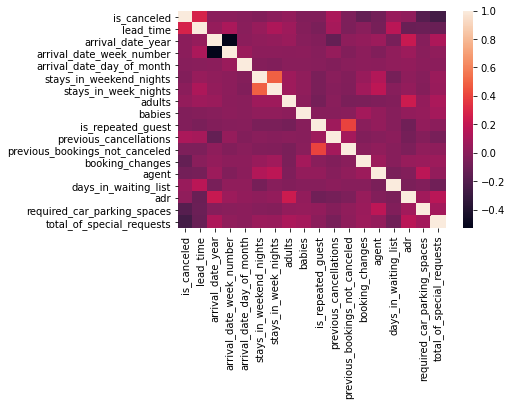

In [15]:
heatmap = sns.heatmap(dfd)
fig = heatmap.get_figure()

In [16]:
fig.savefig('corr_heatmap.png')

## IV. KNN Imports

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

## V. Data KNN Exploration

For this analysis, We wanted to see if we could predict which hotel bookings might be cancelled. To use this, we decided to use the K nearest neighbor analysis because we wanted to see if we could train data from bookings that have already been cancelled.

In [18]:
dfa["is_canceled"].unique()

array([0, 1], dtype=int64)

In [19]:
dfa["reserved_room_type"].unique()

array(['A', 'C', 'D', 'E', 'G', 'F', 'H', 'B'], dtype=object)

In [20]:
dfa["deposit_type"].unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [21]:
dfa["customer_type"].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [171]:
dfa["meal"].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [22]:
dfa["agent"].unique()

array([304., 240., 303.,  15., 241.,   8., 250., 115.,   5., 175., 134.,
       156., 243., 242.,   3., 105.,  40., 147., 306., 184.,  96.,   2.,
       127.,  95., 146.,   9., 177.,   6., 143., 244., 149., 167., 300.,
       171., 305.,  67., 196., 152., 142., 261., 104.,  36.,  26.,  29.,
       258., 110.,  71., 181.,  88., 251., 275.,  69., 248., 208., 256.,
       314., 126., 281., 273., 253., 185., 330., 334., 328., 326., 321.,
       324., 313.,  38., 155.,  68., 335., 308., 332.,  94., 348., 310.,
       339., 375.,  66., 327., 387., 298.,  91., 245., 385., 257., 393.,
       168., 405., 249., 315.,  75., 128., 307.,  11., 436.,   1., 201.,
       183., 223., 368., 336., 291., 464., 411., 481.,  10., 154., 468.,
       410., 390., 440., 495., 492., 493., 434.,  57., 531., 420., 483.,
       526., 472., 429.,  16.,  34., 252., 270.,  47., 114., 301., 193.,
       182., 135., 350., 195., 352., 355., 159., 139., 363., 384., 360.,
       331., 367.,  64.,  78., 406., 163., 414., 33

In [23]:
dfa["distribution_channel"].unique()

array(['Corporate', 'TA/TO', 'Direct', 'GDS'], dtype=object)

In [24]:
dfa["is_canceled"].dtype

dtype('int64')

In [25]:
dfa.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [26]:
categorical_variables = ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status']

In [27]:
dfa_dummies = pd.get_dummies(dfa, columns = categorical_variables)

In [28]:
dfa_dummies.columns

Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies',
       ...
       'deposit_type_No Deposit', 'deposit_type_Non Refund',
       'deposit_type_Refundable', 'customer_type_Contract',
       'customer_type_Group', 'customer_type_Transient',
       'customer_type_Transient-Party', 'reservation_status_Canceled',
       'reservation_status_Check-Out', 'reservation_status_No-Show'],
      dtype='object', length=252)

## VI. KNN Classification

For this classification, I'm curious to see whether factors like the hotel type, lead time, the number of children, the number of babies, country, booking changes, repeated guests, previous cancellations, deposit type, or customer type can be good predictors as to whether a hotel booking is cancelled or not.

### i. Classification by Party Division

In [29]:
X = np.array(dfa_dummies[['adults','children','babies']])
y = np.array(dfa_dummies['is_canceled'])

In [30]:
x_train, x_test_prime, y_train, y_test_prime = train_test_split(X, y, test_size=.50, random_state=42)
x_validate, x_test, y_validate, y_test = train_test_split(x_test_prime, y_test_prime, test_size=.25, random_state=42)

In [31]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [32]:
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

### ii. Validation by Party Division

In [33]:
y_validate_pred = knn_model.predict(x_validate)

In [34]:
y_validate_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [35]:
accuracy = metrics.accuracy_score(y_validate,y_validate_pred)
precision = metrics.precision_score(y_validate,y_validate_pred)
recall = metrics.recall_score(y_validate,y_validate_pred)
f1 = metrics.f1_score(y_validate,y_validate_pred)

In [36]:
print(accuracy, precision, recall, f1)

0.6069197874821822 0.46235606731620904 0.034610794324360164 0.06440071556350625


### iii. Test by Party Division

In [37]:
y_pred = knn_model.predict(x_test)

In [38]:
accuracy = metrics.accuracy_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred)
recall = metrics.recall_score(y_test,y_pred)
f1 = metrics.f1_score(y_test,y_pred)

In [39]:
print(accuracy, precision, recall, f1)

0.6079147877468511 0.44751381215469616 0.03236763236763237 0.06036892118501957


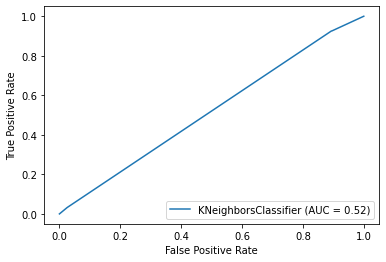

In [40]:
roc1 = metrics.plot_roc_curve(knn_model,x_test, y_test)
plt.savefig('roc1.png')

### iv. Changing Data Split for Party Division

In [41]:
x_train, x_test_prime, y_train, y_test_prime = train_test_split(X, y, test_size=.70, random_state=42)
x_validate, x_test, y_validate, y_test = train_test_split(x_test_prime, y_test_prime, test_size=.15, random_state=42)

In [42]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [43]:
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [44]:
y_validate_pred = knn_model.predict(x_validate)

In [45]:
y_validate_pred

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [46]:
accuracy = metrics.accuracy_score(y_validate,y_validate_pred)
precision = metrics.precision_score(y_validate,y_validate_pred)
recall = metrics.recall_score(y_validate,y_validate_pred)
f1 = metrics.f1_score(y_validate,y_validate_pred)

In [47]:
print(accuracy, precision, recall, f1)

0.4744209597856979 0.4100433051922488 0.7827648114901257 0.538171171041867


In [48]:
y_pred = knn_model.predict(x_test)

In [49]:
accuracy = metrics.accuracy_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred)
recall = metrics.recall_score(y_test,y_pred)
f1 = metrics.f1_score(y_test,y_pred)

In [50]:
print(accuracy, precision, recall, f1)

0.472047389855609 0.4084733201581028 0.7832780672666982 0.536937814580289


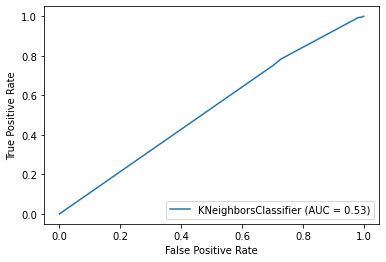

In [51]:
roc2 = metrics.plot_roc_curve(knn_model,x_test, y_test)
plt.savefig('roc2.png')

### v. Changing Neighbor Size for Party Division - half learn

In [52]:
x_train, x_test_prime, y_train, y_test_prime = train_test_split(X, y, test_size=.50, random_state=42)
x_validate, x_test, y_validate, y_test = train_test_split(x_test_prime, y_test_prime, test_size=.25, random_state=42)

In [53]:
knn_model = KNeighborsClassifier(n_neighbors=20)

In [54]:
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=20)

In [55]:
y_validate_pred = knn_model.predict(x_validate)

In [56]:
y_validate_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [57]:
accuracy = metrics.accuracy_score(y_validate,y_validate_pred)
precision = metrics.precision_score(y_validate,y_validate_pred)
recall = metrics.recall_score(y_validate,y_validate_pred)
f1 = metrics.f1_score(y_validate,y_validate_pred)

In [58]:
print(accuracy, precision, recall, f1)

0.6068679538680835 0.4614019520851819 0.034478185916987134 0.064161885372324


In [59]:
y_pred = knn_model.predict(x_test)

In [60]:
accuracy = metrics.accuracy_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred)
recall = metrics.recall_score(y_test,y_pred)
f1 = metrics.f1_score(y_test,y_pred)

In [61]:
print(accuracy, precision, recall, f1)

0.6080702845591666 0.45 0.03236763236763237 0.06039142590866729


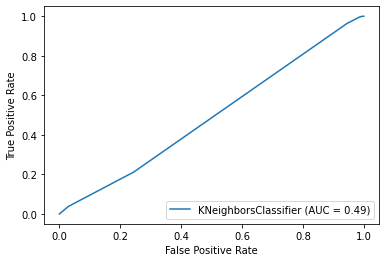

In [62]:
roc3 = metrics.plot_roc_curve(knn_model,x_test, y_test)
plt.savefig('roc3.png')

### vi. Changing Neighbor Size for Party Division - most learn

In [63]:
x_train, x_test_prime, y_train, y_test_prime = train_test_split(X, y, test_size=.70, random_state=42)
x_validate, x_test, y_validate, y_test = train_test_split(x_test_prime, y_test_prime, test_size=.15, random_state=42)

In [64]:
knn_model = KNeighborsClassifier(n_neighbors=20)

In [65]:
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=20)

In [66]:
y_validate_pred = knn_model.predict(x_validate)

In [67]:
y_validate_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [68]:
accuracy = metrics.accuracy_score(y_validate,y_validate_pred)
precision = metrics.precision_score(y_validate,y_validate_pred)
recall = metrics.recall_score(y_validate,y_validate_pred)
f1 = metrics.f1_score(y_validate,y_validate_pred)

In [69]:
print(accuracy, precision, recall, f1)

0.5943941720296625 0.3870802358369649 0.06304538432633293 0.10843027430705156


In [70]:
y_pred = knn_model.predict(x_test)

In [71]:
accuracy = metrics.accuracy_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred)
recall = metrics.recall_score(y_test,y_pred)
f1 = metrics.f1_score(y_test,y_pred)

In [72]:
print(accuracy, precision, recall, f1)

0.5944094779711218 0.38269794721407624 0.061819043107531974 0.1064437194127243


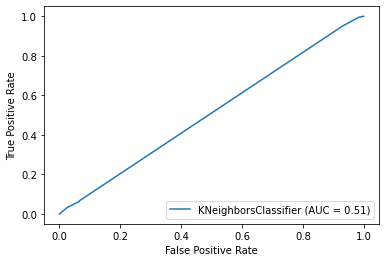

In [73]:
roc4 = metrics.plot_roc_curve(knn_model,x_test, y_test)
plt.savefig('roc4.png')

### vii. Classification by Booking Length

In [74]:
X = np.array(dfa_dummies[['lead_time','stays_in_week_nights','stays_in_weekend_nights']])
y = np.array(dfa_dummies['is_canceled'])

In [75]:
x_train, x_test_prime, y_train, y_test_prime = train_test_split(X, y, test_size=.50, random_state=42)
x_validate, x_test, y_validate, y_test = train_test_split(x_test_prime, y_test_prime, test_size=.25, random_state=42)

In [76]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [77]:
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

### viii. Validation by Booking Length

In [78]:
y_validate_pred = knn_model.predict(x_validate)

In [79]:
y_validate_pred

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [80]:
accuracy = metrics.accuracy_score(y_validate,y_validate_pred)
precision = metrics.precision_score(y_validate,y_validate_pred)
recall = metrics.recall_score(y_validate,y_validate_pred)
f1 = metrics.f1_score(y_validate,y_validate_pred)

In [81]:
print(accuracy, precision, recall, f1)

0.6962550213813659 0.6329484340398608 0.5306325421031693 0.5772920724229965


### ix. Test by Booking Length

In [82]:
y_pred = knn_model.predict(x_test)

In [83]:
accuracy = metrics.accuracy_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred)
recall = metrics.recall_score(y_test,y_pred)
f1 = metrics.f1_score(y_test,y_pred)

In [84]:
print(accuracy, precision, recall, f1)

0.6984916809205411 0.6345189782764383 0.531068931068931 0.5782031759843377


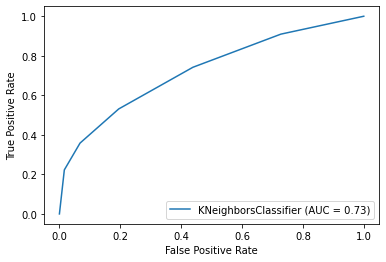

In [85]:
roc5 = metrics.plot_roc_curve(knn_model,x_test, y_test)
plt.savefig('roc5.png')

### x. Changing Data Split for Booking Length

In [86]:
x_train, x_test_prime, y_train, y_test_prime = train_test_split(X, y, test_size=.70, random_state=42)
x_validate, x_test, y_validate, y_test = train_test_split(x_test_prime, y_test_prime, test_size=.15, random_state=42)

In [87]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [88]:
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [89]:
y_validate_pred = knn_model.predict(x_validate)

In [90]:
y_validate_pred

array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

In [91]:
accuracy = metrics.accuracy_score(y_validate,y_validate_pred)
precision = metrics.precision_score(y_validate,y_validate_pred)
recall = metrics.recall_score(y_validate,y_validate_pred)
f1 = metrics.f1_score(y_validate,y_validate_pred)

In [92]:
print(accuracy, precision, recall, f1)

0.6841821567410408 0.6107379330198638 0.5314600642979417 0.568347732904695


In [93]:
y_pred = knn_model.predict(x_test)

In [94]:
accuracy = metrics.accuracy_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred)
recall = metrics.recall_score(y_test,y_pred)
f1 = metrics.f1_score(y_test,y_pred)

In [95]:
print(accuracy, precision, recall, f1)

0.6816919659385413 0.6064147866268007 0.5284225485551871 0.5647386406783951


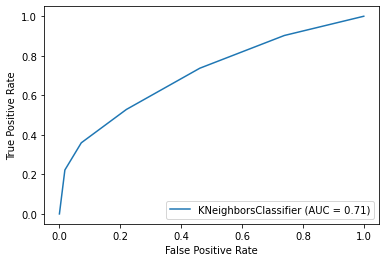

In [96]:
roc6 = metrics.plot_roc_curve(knn_model,x_test, y_test)
plt.savefig('roc6.png')

### xi. Changing Neighbor Size for Booking Length - half learn

In [97]:
x_train, x_test_prime, y_train, y_test_prime = train_test_split(X, y, test_size=.50, random_state=42)
x_validate, x_test, y_validate, y_test = train_test_split(x_test_prime, y_test_prime, test_size=.25, random_state=42)

In [98]:
knn_model = KNeighborsClassifier(n_neighbors=20)

In [99]:
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=20)

In [100]:
y_validate_pred = knn_model.predict(x_validate)

In [101]:
y_validate_pred

array([1, 1, 0, ..., 0, 0, 1], dtype=int64)

In [102]:
accuracy = metrics.accuracy_score(y_validate,y_validate_pred)
precision = metrics.precision_score(y_validate,y_validate_pred)
recall = metrics.recall_score(y_validate,y_validate_pred)
f1 = metrics.f1_score(y_validate,y_validate_pred)

In [103]:
print(accuracy, precision, recall, f1)

0.7059479072178307 0.6891454029971649 0.4512664102904124 0.5453962657264203


In [104]:
y_pred = knn_model.predict(x_test)

In [105]:
accuracy = metrics.accuracy_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred)
recall = metrics.recall_score(y_test,y_pred)
f1 = metrics.f1_score(y_test,y_pred)

In [106]:
print(accuracy, precision, recall, f1)

0.7129528844658685 0.7005805071799572 0.45814185814185815 0.5539985503744865


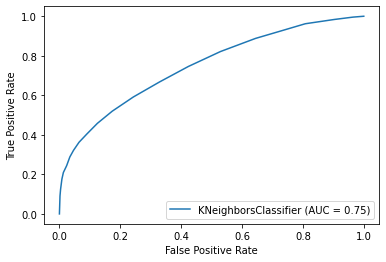

In [107]:
roc7 = metrics.plot_roc_curve(knn_model,x_test, y_test)
plt.savefig('roc7.png')

### xii. Changing Neighbor Size for Booking Length - larger learn

In [108]:
x_train, x_test_prime, y_train, y_test_prime = train_test_split(X, y, test_size=.70, random_state=42)
x_validate, x_test, y_validate, y_test = train_test_split(x_test_prime, y_test_prime, test_size=.15, random_state=42)

In [109]:
knn_model = KNeighborsClassifier(n_neighbors=20)

In [110]:
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=20)

In [111]:
y_validate_pred = knn_model.predict(x_validate)

In [112]:
y_validate_pred

array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

In [113]:
accuracy = metrics.accuracy_score(y_validate,y_validate_pred)
precision = metrics.precision_score(y_validate,y_validate_pred)
recall = metrics.recall_score(y_validate,y_validate_pred)
f1 = metrics.f1_score(y_validate,y_validate_pred)

In [114]:
print(accuracy, precision, recall, f1)

0.6921858155564993 0.6631518404907976 0.43325957162540185 0.5241041440440415


In [115]:
y_pred = knn_model.predict(x_test)

In [116]:
accuracy = metrics.accuracy_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred)
recall = metrics.recall_score(y_test,y_pred)
f1 = metrics.f1_score(y_test,y_pred)

In [117]:
print(accuracy, precision, recall, f1)

0.7001110699740837 0.6762383345297918 0.4462340123164377 0.5376712328767124


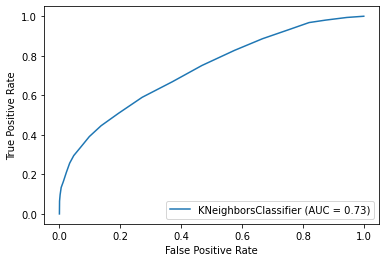

In [118]:
roc8 = metrics.plot_roc_curve(knn_model,x_test, y_test)
plt.savefig('roc8.png')

### Creating a Dummy Set so we can use Categorical Variables

In [119]:
columnsList = list(dfa_dummies.columns)

In [120]:
columnsList

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status_date',
 'hotel_City Hotel',
 'hotel_Resort Hotel',
 'arrival_date_month_April',
 'arrival_date_month_August',
 'arrival_date_month_December',
 'arrival_date_month_February',
 'arrival_date_month_January',
 'arrival_date_month_July',
 'arrival_date_month_June',
 'arrival_date_month_March',
 'arrival_date_month_May',
 'arrival_date_month_November',
 'arrival_date_month_October',
 'arrival_date_month_September',
 'meal_BB',
 'meal_FB',
 'meal_HB',
 'meal_SC',
 'meal_Undefined',
 'country_ABW',
 'country_AGO',
 'country_AIA',
 'country_ALB',
 'country_AND',
 'country_A

In [121]:
dfa_dummies

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Canceled,reservation_status_Check-Out,reservation_status_No-Show
0,0,13,2015,27,1,0,1,1,0.0,0,...,1,0,0,0,0,1,0,0,1,0
1,0,14,2015,27,1,0,2,2,0.0,0,...,1,0,0,0,0,1,0,0,1,0
2,0,14,2015,27,1,0,2,2,0.0,0,...,1,0,0,0,0,1,0,0,1,0
3,0,9,2015,27,1,0,2,2,0.0,0,...,1,0,0,0,0,1,0,0,1,0
4,1,85,2015,27,1,0,3,2,0.0,0,...,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102889,0,23,2017,35,30,2,5,2,0.0,0,...,1,0,0,0,0,1,0,0,1,0
102890,0,102,2017,35,31,2,5,3,0.0,0,...,1,0,0,0,0,1,0,0,1,0
102891,0,34,2017,35,31,2,5,2,0.0,0,...,1,0,0,0,0,1,0,0,1,0
102892,0,109,2017,35,31,2,5,2,0.0,0,...,1,0,0,0,0,1,0,0,1,0


#### Function to filter column names without separation

In [122]:
def checkName(list, containingPhrase):
    newList = []
    for i in list:
        if i.__contains__(containingPhrase):
            newList.append(i)
    return newList

### xiii. Classification by Stay Info and Payment

In [123]:
hotelNames = checkName(columnsList, "hotel")

In [124]:
customer_type = checkName(columnsList, "customer_type")

In [125]:
deposit_type = checkName(columnsList, "deposit_type")

In [126]:
columns = customer_type + deposit_type + hotelNames
X = np.array(dfa_dummies[columns])
y = np.array(dfa_dummies['is_canceled'])

In [127]:
x_train, x_test_prime, y_train, y_test_prime = train_test_split(X, y, test_size=.50, random_state=42)
x_validate, x_test, y_validate, y_test = train_test_split(x_test_prime, y_test_prime, test_size=.25, random_state=42)

In [128]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [129]:
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

### xiv. Validation by Stay Info and Payment

In [130]:
y_validate_pred = knn_model.predict(x_validate)

In [131]:
y_validate_pred

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [132]:
accuracy = metrics.accuracy_score(y_validate,y_validate_pred)
precision = metrics.precision_score(y_validate,y_validate_pred)
recall = metrics.recall_score(y_validate,y_validate_pred)
f1 = metrics.f1_score(y_validate,y_validate_pred)

In [133]:
print(accuracy, precision, recall, f1)

0.531631463003758 0.4434868072881228 0.777880917650179 0.5649075500770416


### xv. Test by Stay Info and Payment

In [134]:
y_pred = knn_model.predict(x_test)

In [135]:
accuracy = metrics.accuracy_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred)
recall = metrics.recall_score(y_test,y_pred)
f1 = metrics.f1_score(y_test,y_pred)

In [136]:
print(accuracy, precision, recall, f1)

0.5254237288135594 0.43784639746634996 0.7734265734265734 0.5591506572295248


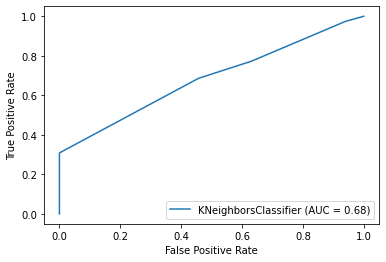

In [137]:
roc9 = metrics.plot_roc_curve(knn_model,x_test, y_test)
plt.savefig('roc9.png')

### xvi. Changing Data Split for Stay Info and Payment

In [138]:
x_train, x_test_prime, y_train, y_test_prime = train_test_split(X, y, test_size=.70, random_state=42)
x_validate, x_test, y_validate, y_test = train_test_split(x_test_prime, y_test_prime, test_size=.15, random_state=42)

In [139]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [140]:
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [141]:
y_validate_pred = knn_model.predict(x_validate)

In [142]:
y_validate_pred

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

In [143]:
accuracy = metrics.accuracy_score(y_validate,y_validate_pred)
precision = metrics.precision_score(y_validate,y_validate_pred)
recall = metrics.recall_score(y_validate,y_validate_pred)
f1 = metrics.f1_score(y_validate,y_validate_pred)

In [144]:
print(accuracy, precision, recall, f1)

0.5992127013165202 0.49147264260768336 0.7050645067011816 0.5792046097648814


In [145]:
y_pred = knn_model.predict(x_test)

In [146]:
accuracy = metrics.accuracy_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred)
recall = metrics.recall_score(y_test,y_pred)
f1 = metrics.f1_score(y_test,y_pred)

In [147]:
print(accuracy, precision, recall, f1)

0.5917252869307664 0.4844954881050041 0.6994315490288963 0.572453232528836


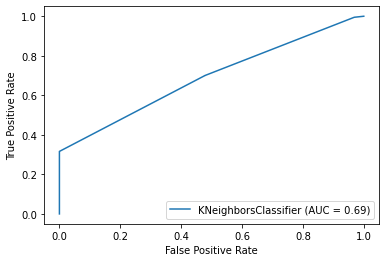

In [148]:
roc10 = metrics.plot_roc_curve(knn_model,x_test, y_test)
plt.savefig('roc10.png')

### xvii. Changing Neighbor Size for Party Division - half learn

In [149]:
x_train, x_test_prime, y_train, y_test_prime = train_test_split(X, y, test_size=.50, random_state=42)
x_validate, x_test, y_validate, y_test = train_test_split(x_test_prime, y_test_prime, test_size=.25, random_state=42)

In [150]:
knn_model = KNeighborsClassifier(n_neighbors=20)

In [151]:
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=20)

In [152]:
y_validate_pred = knn_model.predict(x_validate)

In [153]:
y_validate_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [154]:
accuracy = metrics.accuracy_score(y_validate,y_validate_pred)
precision = metrics.precision_score(y_validate,y_validate_pred)
recall = metrics.recall_score(y_validate,y_validate_pred)
f1 = metrics.f1_score(y_validate,y_validate_pred)

In [155]:
print(accuracy, precision, recall, f1)

0.731709213424906 0.9995775242923531 0.31375149184458295 0.47759386354461036


In [156]:
y_pred = knn_model.predict(x_test)

In [157]:
accuracy = metrics.accuracy_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred)
recall = metrics.recall_score(y_test,y_pred)
f1 = metrics.f1_score(y_test,y_pred)

In [158]:
print(accuracy, precision, recall, f1)

0.7308350178821335 0.9993527508090615 0.30849150849150847 0.4714503816793893


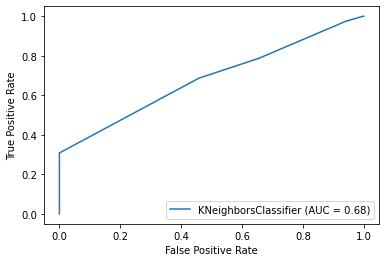

In [159]:
roc11 = metrics.plot_roc_curve(knn_model,x_test, y_test)
plt.savefig('roc11.png')

### xviii. Changing Neighbor Size for Party Division - most learn

In [160]:
x_train, x_test_prime, y_train, y_test_prime = train_test_split(X, y, test_size=.70, random_state=42)
x_validate, x_test, y_validate, y_test = train_test_split(x_test_prime, y_test_prime, test_size=.15, random_state=42)

In [161]:
knn_model = KNeighborsClassifier(n_neighbors=20)

In [162]:
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=20)

In [163]:
y_validate_pred = knn_model.predict(x_validate)

In [164]:
y_validate_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [165]:
accuracy = metrics.accuracy_score(y_validate,y_validate_pred)
precision = metrics.precision_score(y_validate,y_validate_pred)
recall = metrics.recall_score(y_validate,y_validate_pred)
f1 = metrics.f1_score(y_validate,y_validate_pred)

In [166]:
print(accuracy, precision, recall, f1)

0.7303093659142138 0.9994629430719656 0.31080121915577635 0.47415522787349906


In [167]:
y_pred = knn_model.predict(x_test)

In [168]:
accuracy = metrics.accuracy_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred)
recall = metrics.recall_score(y_test,y_pred)
f1 = metrics.f1_score(y_test,y_pred)

In [169]:
print(accuracy, precision, recall, f1)

0.7327841540170307 1.0 0.31620085267645665 0.48047507648011517


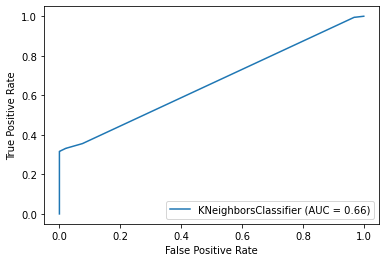

In [170]:
roc12 = metrics.plot_roc_curve(knn_model,x_test, y_test)
plt.savefig('roc12.png')

In [174]:
pd.show_versions()


INSTALLED VERSIONS
------------------
commit           : db08276bc116c438d3fdee492026f8223584c477
python           : 3.8.5.final.0
python-bits      : 64
OS               : Windows
OS-release       : 10
Version          : 10.0.18362
machine          : AMD64
processor        : Intel64 Family 6 Model 142 Stepping 10, GenuineIntel
byteorder        : little
LC_ALL           : None
LANG             : None
LOCALE           : English_United States.1252

pandas           : 1.1.3
numpy            : 1.19.2
pytz             : 2020.1
dateutil         : 2.8.1
pip              : 20.2.4
setuptools       : 50.3.1.post20201107
Cython           : 0.29.21
pytest           : 6.1.1
hypothesis       : None
sphinx           : 3.2.1
blosc            : None
feather          : None
xlsxwriter       : 1.3.7
lxml.etree       : 4.6.1
html5lib         : 1.1
pymysql          : None
psycopg2         : None
jinja2           : 2.11.2
IPython          : 7.19.0
pandas_datareader: None
bs4              : 4.9.3
bottleneck 

In [175]:
sns.__version__

'0.11.0'